In [1]:
!pip install qiskit matplotlib scipy numpy

#qiskit → quantum circuits

#matplotlib → plotting graphs

#scipy → chi-square test

#numpy → math/statistics


In [2]:
!pip install qiskit-aer --upgrade

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile

In [4]:
def classical_rng(n_bits=10000):
    """
    Generate classical random bits using Python's random module.
    """
    return [random.randint(0, 1) for _ in range(n_bits)]

In [5]:
def quantum_rng(n_bits=10000):
    """
    Efficient quantum random bit generator using shots.
    """
    backend = Aer.get_backend('qasm_simulator')

    # Use single qubit circuit
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.measure(0, 0)

    # Transpile once
    compiled = transpile(qc, backend)

    # Run with many shots
    job = backend.run(compiled, shots=n_bits)
    result = job.result()
    counts = result.get_counts()

    # Convert counts to bit list
    bits = []
    for bitstring, count in counts.items():
        bits.extend([int(bitstring)] * count)

    return bits

In [6]:
N = 10000

print("Generating classical bits...")
classical_bits = classical_rng(N)

print("Generating quantum bits (may take time)...")
quantum_bits = quantum_rng(N)

print("Done!")

Generating classical bits...
Generating quantum bits (may take time)...
Done!


In [7]:
def analyze_bits(bits, label="Source"):
    """
    Compute frequency, mean, variance, and entropy.
    """
    zeros = bits.count(0)
    ones = bits.count(1)

    mean = np.mean(bits)
    var = np.var(bits)

    # Entropy calculation
    p0 = zeros / len(bits)
    p1 = ones / len(bits)

    entropy = 0
    for p in [p0, p1]:
        if p > 0:
            entropy -= p * np.log2(p)

    print(f"\n--- {label} ---")
    print(f"Total bits : {len(bits)}")
    print(f"Zeros      : {zeros}")
    print(f"Ones       : {ones}")
    print(f"Mean       : {mean:.4f}")
    print(f"Variance   : {var:.4f}")
    print(f"Entropy    : {entropy:.4f}")

    return [zeros, ones]

In [8]:
classical_counts = analyze_bits(classical_bits, "Classical RNG")
quantum_counts = analyze_bits(quantum_bits, "Quantum RNG")


--- Classical RNG ---
Total bits : 10000
Zeros      : 4983
Ones       : 5017
Mean       : 0.5017
Variance   : 0.2500
Entropy    : 1.0000

--- Quantum RNG ---
Total bits : 10000
Zeros      : 4960
Ones       : 5040
Mean       : 0.5040
Variance   : 0.2500
Entropy    : 1.0000


In [9]:
print("\nChi-square Test (Classical):")
print(chisquare(classical_counts))

print("\nChi-square Test (Quantum):")
print(chisquare(quantum_counts))


Chi-square Test (Classical):
Power_divergenceResult(statistic=0.1156, pvalue=0.7338565279279439)

Chi-square Test (Quantum):
Power_divergenceResult(statistic=0.64, pvalue=0.4237107971667936)


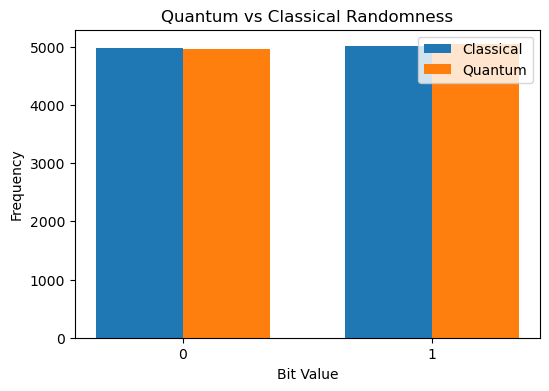

In [10]:
labels = ['0', '1']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, classical_counts, width, label='Classical')
plt.bar(x + width/2, quantum_counts, width, label='Quantum')

plt.xlabel("Bit Value")
plt.ylabel("Frequency")
plt.title("Quantum vs Classical Randomness")
plt.xticks(x, labels)
plt.legend()
plt.show()